In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# Load dataset from csv file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/knn_dataset.csv')
df.head(5)

,sl. no.,height,weight,target
0,1,160,110,1
1,2,170,90,1
2,3,135,45,0
3,4,140,50,0
4,5,155,80,1


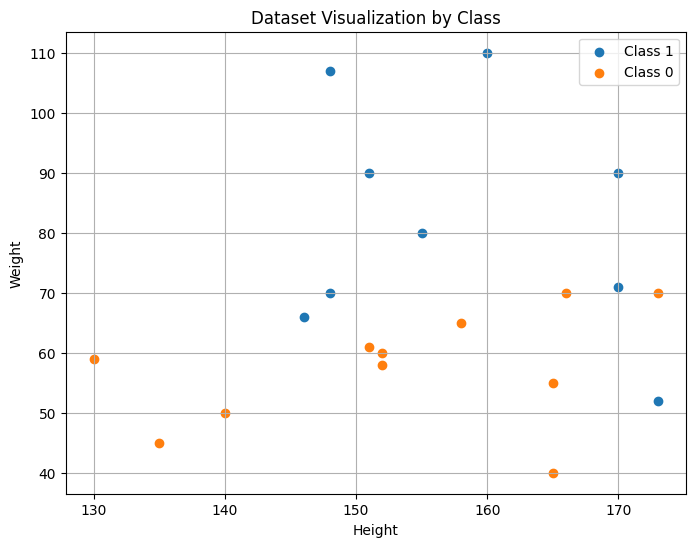

In [6]:
plt.figure(figsize=(8,6))
for label in df['target'].unique():
    cluster = df[df['target'] == label]
    plt.scatter(cluster['height'], cluster['weight'], label=f'Class {label}')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Dataset Visualization by Class')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Input data
X = df[['height', 'weight']]
y = df['target']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
# Predictions
y_pred = knn.predict(X_test)
# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 0]
 [1 2]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [8]:
# Example: Predict class for a new data point
new_data = pd.DataFrame({'height': [158], 'weight': [64]})
predicted_class = knn.predict(new_data)
print('Predicted class for [height=158, weight=64]:', predicted_class[0])

Predicted class for [height=158, weight=64]: 0
